In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [101]:
df = pd.read_csv("personalized_learning_dataset.csv")  

In [102]:
df = df[['Age', 'Education_Level', 'Course_Name', 'Time_Spent_on_Videos', 'Quiz_Scores', 'Final_Exam_Score']]
df.dropna(inplace=True)

In [103]:
def assign_proficiency(score):
    if score <= 50:
        return 'beginner'
    elif score <= 80:
        return 'intermediate'
    else:
        return 'advanced'

In [104]:
df['Proficiency_Level'] = df['Final_Exam_Score'].apply(assign_proficiency)

features = ['Age', 'Education_Level', 'Course_Name', 'Time_Spent_on_Videos', 'Quiz_Scores', 'Final_Exam_Score']
target = 'Proficiency_Level'

In [105]:
X = df[features]
y = df[target]

X_encoded = pd.get_dummies(X, columns=['Education_Level', 'Course_Name'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.05, random_state=42)

cart_classifier = DecisionTreeClassifier(criterion="gini", random_state=42)
cart_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [106]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [107]:
y_pred = best_classifier.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    advanced       1.00      1.00      1.00       139
    beginner       1.00      1.00      1.00       141
intermediate       1.00      1.00      1.00       220

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Accuracy: 1.0


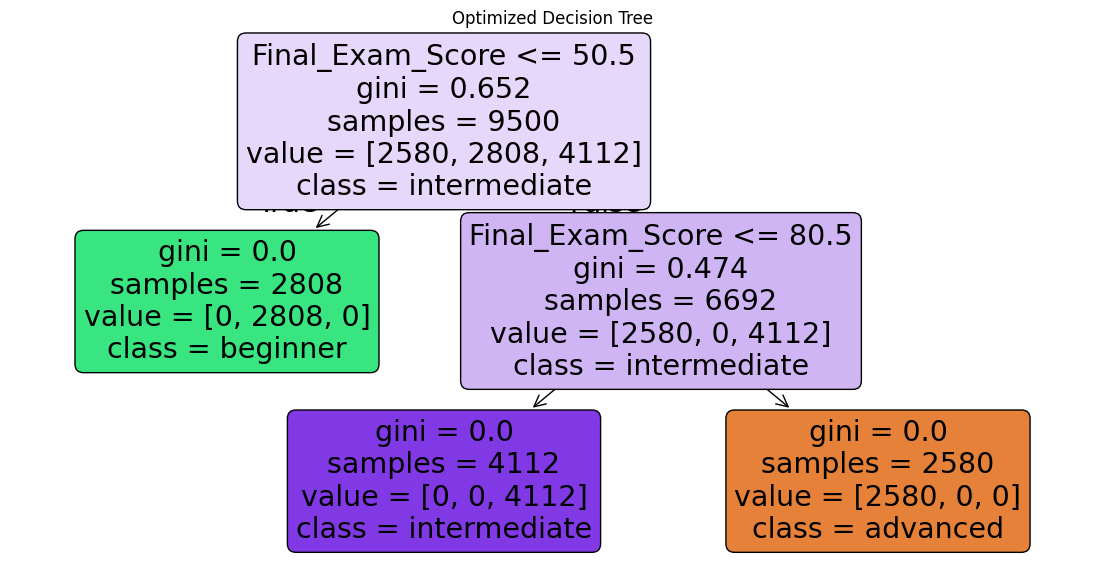

In [108]:
plt.figure(figsize=(14, 7))
plot_tree(best_classifier, feature_names=X_encoded.columns, class_names=best_classifier.classes_, filled=True, rounded=True)
plt.title("Optimized Decision Tree")
plt.show()


In [109]:
def predict_proficiency(age, education_level, course_name, time_spent, quiz_scores, final_exam_score):
    input_dict = {
        'Age': [age],
        'Time_Spent_on_Videos': [time_spent],
        'Quiz_Scores': [quiz_scores],
        'Final_Exam_Score': [final_exam_score],
        'Education_Level': [education_level],
        'Course_Name': [course_name]
    }
    input_df = pd.DataFrame(input_dict)
    
    input_encoded = pd.get_dummies(input_df, columns=['Education_Level', 'Course_Name'], drop_first=True)
    
    for col in X_encoded.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[X_encoded.columns]
    
    prediction = best_classifier.predict(input_encoded)[0]
    return prediction

In [110]:
sample_prediction = predict_proficiency(
    age=15,
    education_level="High School",   
    course_name="Machine Learning",  
    time_spent=117,
    quiz_scores=67,
    final_exam_score=75
)

print(f"\nPredicted Proficiency Level: {sample_prediction}")


Predicted Proficiency Level: intermediate
